In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import HTML

In [41]:
# function to display figures with formatting and caption
def display_figure(fig, fig_id, caption, w=0.6, fs=12):
    import io
    import base64
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    pic_IObytes = io.BytesIO()
    
    # set fontsize for title and labels        
    for ax in fig.axes:
        text_items = [ax.title, ax.xaxis.label, ax.yaxis.label]
        if ax.get_legend() is not None:
            text_items = text_items + ax.get_legend().get_texts()
        for item in (text_items + ax.get_xticklabels() + ax.get_yticklabels() ):
            item.set_fontsize(fs)
            
    plt.savefig(pic_IObytes,  format='png', bbox_inches='tight')
    pic_IObytes.seek(0)
    pic_hash = base64.b64encode(pic_IObytes.read())
    img = f'<img margin="auto" width="{w*100}%" src="data:image/png;base64, {str(pic_hash)[2:-1]}" />'
    caption = f'<figcaption style="text-align: center; font-style: italic;">{caption}</figcaption>'
    display(HTML(f'<br><fig width="100%" id={fig_id}><center>{img}</center> {caption}</fig><br>'))
    plt.close(fig)

In [9]:
#read data from csv file
filename = "ans_responses.csv"
ans_df = pd.read_csv(filename)

filename = "math_ability_responses.csv"
maths_df = pd.read_csv(filename)

filename = "memory_test_responses.csv"
memory_df = pd.read_csv(filename)

filename = "spatial_recognition_responses.csv"
sr_df = pd.read_csv(filename)

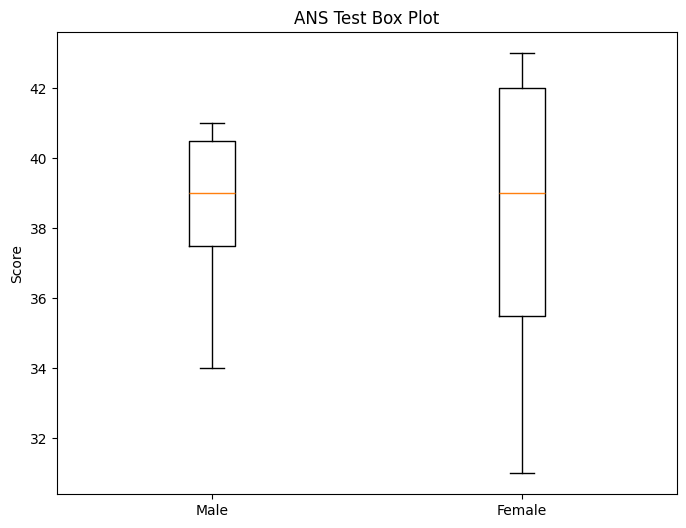

In [10]:
#get males and females score from table respectively
ans_male_scores = ans_df[ans_df['gender']=='M']['score']
ans_female_scores = ans_df[ans_df['gender']=='F']['score']

#create a box plot using Matplotlib
plt.figure(figsize=(8,6))
plt.boxplot([ans_male_scores, ans_female_scores], labels = ['Male','Female'])

#set labels and title
plt.ylabel('Score')
plt.title('ANS Test Box Plot')

#show the plot
#plt.show()

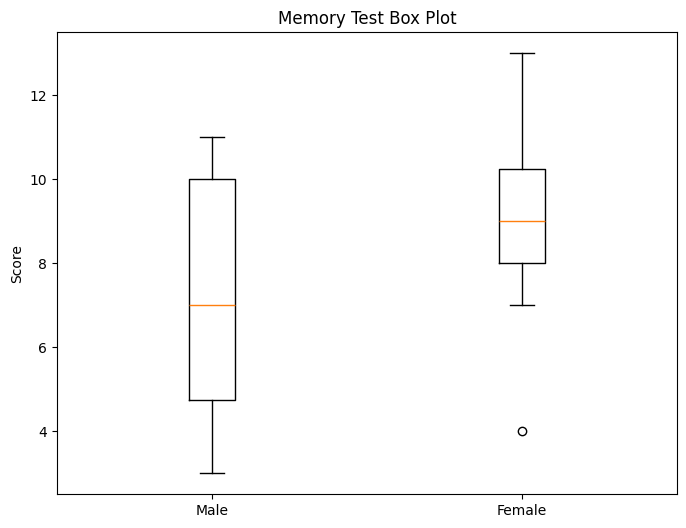

In [11]:
#get males and females score from table respectively
memory_male_scores = memory_df[memory_df['gender']=='Male']['total_score']
memory_female_scores = memory_df[memory_df['gender']=='Female']['total_score']

#create a box plot using Matplotlib
plt.figure(figsize=(8,6))
plt.boxplot([memory_male_scores, memory_female_scores], labels = ['Male','Female'])

#set labels and title
plt.ylabel('Score')
plt.title('Memory Test Box Plot')

#show the plot
#plt.show()

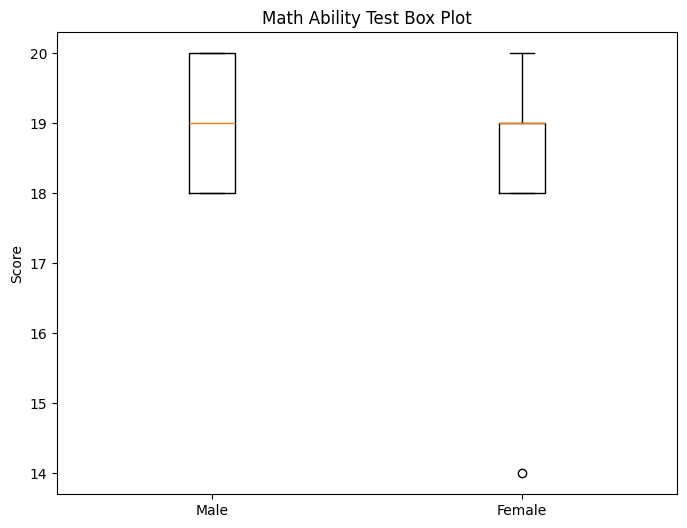

In [12]:
#male and female score pulled out from data
male_scores = maths_df[maths_df['gender'] == 'male']['score']
female_scores = maths_df[maths_df['gender'] == 'female']['score']

#create a box plot using Matplotlib
plt.figure(figsize=(8,6))
plt.boxplot([male_scores, female_scores], labels = ['Male','Female'])

#set labels and title
plt.ylabel('Score')
plt.title('Math Ability Test Box Plot')

#show the plot
#plt.show()

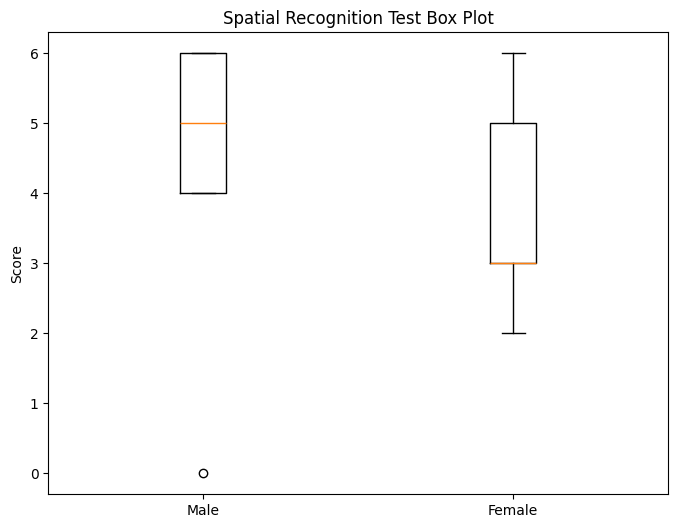

In [13]:
#male and female score pulled out from data
sr_male_scores = sr_df[sr_df['sex'] == 'male']['score']
sr_female_scores = sr_df[sr_df['sex'] == 'female']['score']

#create a box plot using Matplotlib
plt.figure(figsize=(8,6))
plt.boxplot([sr_male_scores, sr_female_scores], labels = ['Male','Female'])

#set labels and title
plt.ylabel('Score')
plt.title('Spatial Recognition Test Box Plot')

#show the plot
#plt.show()

In [57]:
#show all 4 box plots in a figure

fig, ax = plt.subplots(2,2) 

#create a box plot for ANS 
ax[0,0].boxplot([ans_male_scores, ans_female_scores], labels = ['Male','Female'])

#create a box plot for math
ax[0,1].boxplot([sr_male_scores, sr_female_scores], labels = ['Male','Female'])

#create a box plot for memory 
ax[1,0].boxplot([memory_male_scores, memory_female_scores], labels = ['Male','Female'])

#create a box plot for spatial 
ax[1,1].boxplot([male_scores, female_scores], labels = ['Male','Female'])

#set labels and title
ax[0,0].title.set_text("ANS Test")
ax[0,0].set_ylabel('Score')

ax[0,1].title.set_text("Math Test")
ax[0,1].set_ylabel('Score')

ax[1,0].title.set_text("Memory Test")
ax[1,0].set_ylabel('Score')

ax[1,1].title.set_text("Spatial Test")
ax[1,1].set_ylabel('Score')

fig.set_size_inches([8,8])

#display box plots

caption = "Figure 3 : Box Plot for all tests"
fig_id = "fig3"

display_figure(fig, fig, caption, 0.9, 7)